In [6]:
import ROOT
%jsroot on

# Open the ROOT file
file = ROOT.TFile("2023dec_3D_Pr.root", "READ")

# Access the histogram (replace 'histogram_name' with the actual name)
hist = file.Get("hEgam")

hist.SetDirectory(0)



# Check if the histogram exists
if not hist:
    print("Histogram not found")
else:
    # Create a canvas
    canvas = ROOT.TCanvas()

    # Define the region of interest (ROI)
    # Replace these values with your desired range
    x_min = 6000
    x_max = 9000

    # Set the range of the histogram to the region of interest
    hist.GetXaxis().SetRangeUser(x_min, x_max)

    # Draw the histogram within the specified range
    hist.Draw()

    # Create a TSpectrum object
    spectrum = ROOT.TSpectrum()

    # Number of peaks to search for
    npeaks = 10  # Adjust this number based on your expectation

    # Search for peaks
    nfound = spectrum.Search(hist, 2, "", 0.05)

    # Get the positions of the found peaks
    peaks = spectrum.GetPositionX()

    # Optionally, print the peak positions
    for i in range(nfound):
        x_peak = peaks[i]
        y_peak = hist.GetBinContent(hist.FindBin(x_peak))
        print(f"Peak {i+1}: X={x_peak}, Y={y_peak}")

    # Show the canvas
    canvas.Draw()

# Close the file
file.Close()



Peak 1: X=6494.5, Y=1544.0
Peak 2: X=6102.5, Y=1584.0
Peak 3: X=6741.5, Y=1156.0
Peak 4: X=6013.5, Y=1383.0
Peak 5: X=7128.5, Y=671.0
Peak 6: X=6483.5, Y=1210.0
Peak 7: X=6231.5, Y=1430.0
Peak 8: X=6729.5, Y=1063.0
Peak 9: X=7623.5, Y=627.0
Peak 10: X=7117.5, Y=855.0
Peak 11: X=6602.5, Y=1020.0
Peak 12: X=7635.5, Y=503.0
Peak 13: X=6051.5, Y=1441.0
Peak 14: X=7107.5, Y=841.0
Peak 15: X=6619.5, Y=951.0
Peak 16: X=6247.5, Y=1301.0
Peak 17: X=6593.5, Y=950.0
Peak 18: X=6340.5, Y=1096.0
Peak 19: X=6611.5, Y=1064.0
Peak 20: X=7112.5, Y=775.0
Peak 21: X=7269.5, Y=624.0
Peak 22: X=6694.5, Y=818.0
Peak 23: X=6721.5, Y=929.0
Peak 24: X=6081.5, Y=1453.0
Peak 25: X=6766.5, Y=860.0
Peak 26: X=6821.5, Y=752.0
Peak 27: X=6027.5, Y=1362.0
Peak 28: X=6189.5, Y=1214.0
Peak 29: X=7209.5, Y=615.0
Peak 30: X=7179.5, Y=619.0
Peak 31: X=6004.5, Y=1466.0
Peak 32: X=6372.5, Y=1036.0
Peak 33: X=7439.5, Y=481.0
Peak 34: X=6797.5, Y=743.0
Peak 35: X=6441.5, Y=1003.0
Peak 36: X=6579.5, Y=873.0
Peak 37: X=6521.5, 

Warning in <TFile::Init>: file 2023dec_3D_Pr.root probably not closed, trying to recover
Info in <TFile::Recover>: 2023dec_3D_Pr.root, recovered key TH2D:hEn_hEgam at address 232
Info in <TFile::Recover>: 2023dec_3D_Pr.root, recovered key TH1D:hEn at address 5927931
Info in <TFile::Recover>: 2023dec_3D_Pr.root, recovered key TH1D:hEgam at address 6055378
Warning in <TFile::Init>: successfully recovered 3 keys
Warning in <TSpectrum::SearchHighRes>: Peak buffer full


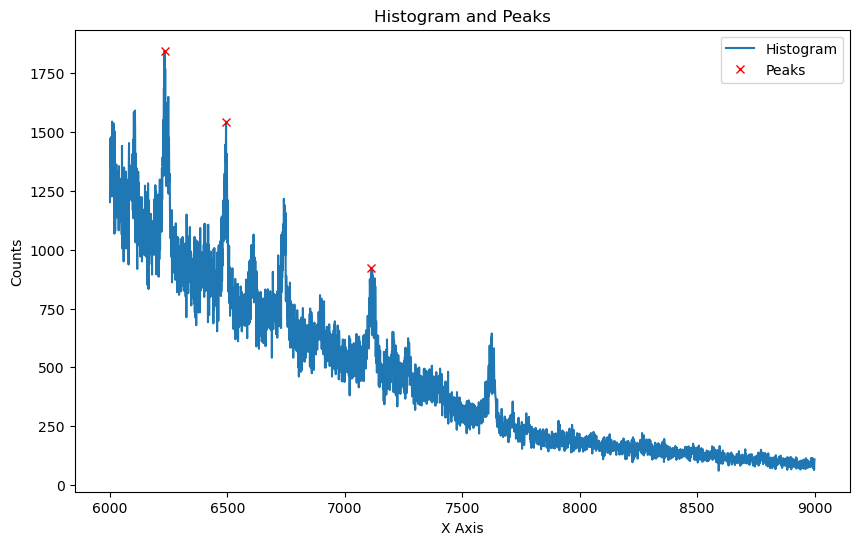

In [29]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Open the ROOT file
with uproot.open("2023dec_3D_Pr.root") as file:
    # Access the histogram
    hist = file["hEgam"]

    # Get histogram data
    data, edges = hist.to_numpy()
    centers = (edges[:-1] + edges[1:]) / 2

    # Define the region of interest (ROI)
    x_min = 6000
    x_max = 9000

    # Apply the ROI
    mask = (centers >= x_min) & (centers <= x_max)
    data, centers = data[mask], centers[mask]

    # Find peaks
    peaks, _ = find_peaks(data, prominence = 50, threshold = 100, width =  10)  # You can adjust parameters as needed

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(centers, data, label='Histogram')
    plt.plot(centers[peaks], data[peaks], 'rx', label='Peaks')
    plt.xlabel('X Axis')
    plt.ylabel('Counts')
    plt.title('Histogram and Peaks')
    plt.legend()
    plt.show()


In [11]:
import uproot

# Path to your ROOT file
file_path = "2023dec_3D_Pr.root"

# Open the ROOT file
with uproot.open(file_path) as file:
    # Print all keys
    print("Available keys in the file:", file.keys())


Available keys in the file: ['hEn_hEgam;1', 'hEn;1', 'hEgam;1']
